'''
1
'''

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
dataset = pd.read_csv('winequality-white.csv', delimiter=';')
df = pd.DataFrame(data=dataset)

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
df.shape

(4898, 12)

In [7]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<AxesSubplot:title={'center':'fixed_acidity'}>,
        <AxesSubplot:title={'center':'volatile_acidity'}>,
        <AxesSubplot:title={'center':'citric_acid'}>],
       [<AxesSubplot:title={'center':'residual_sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free_sulfur_dioxide'}>],
       [<AxesSubplot:title={'center':'total_sulfur_dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

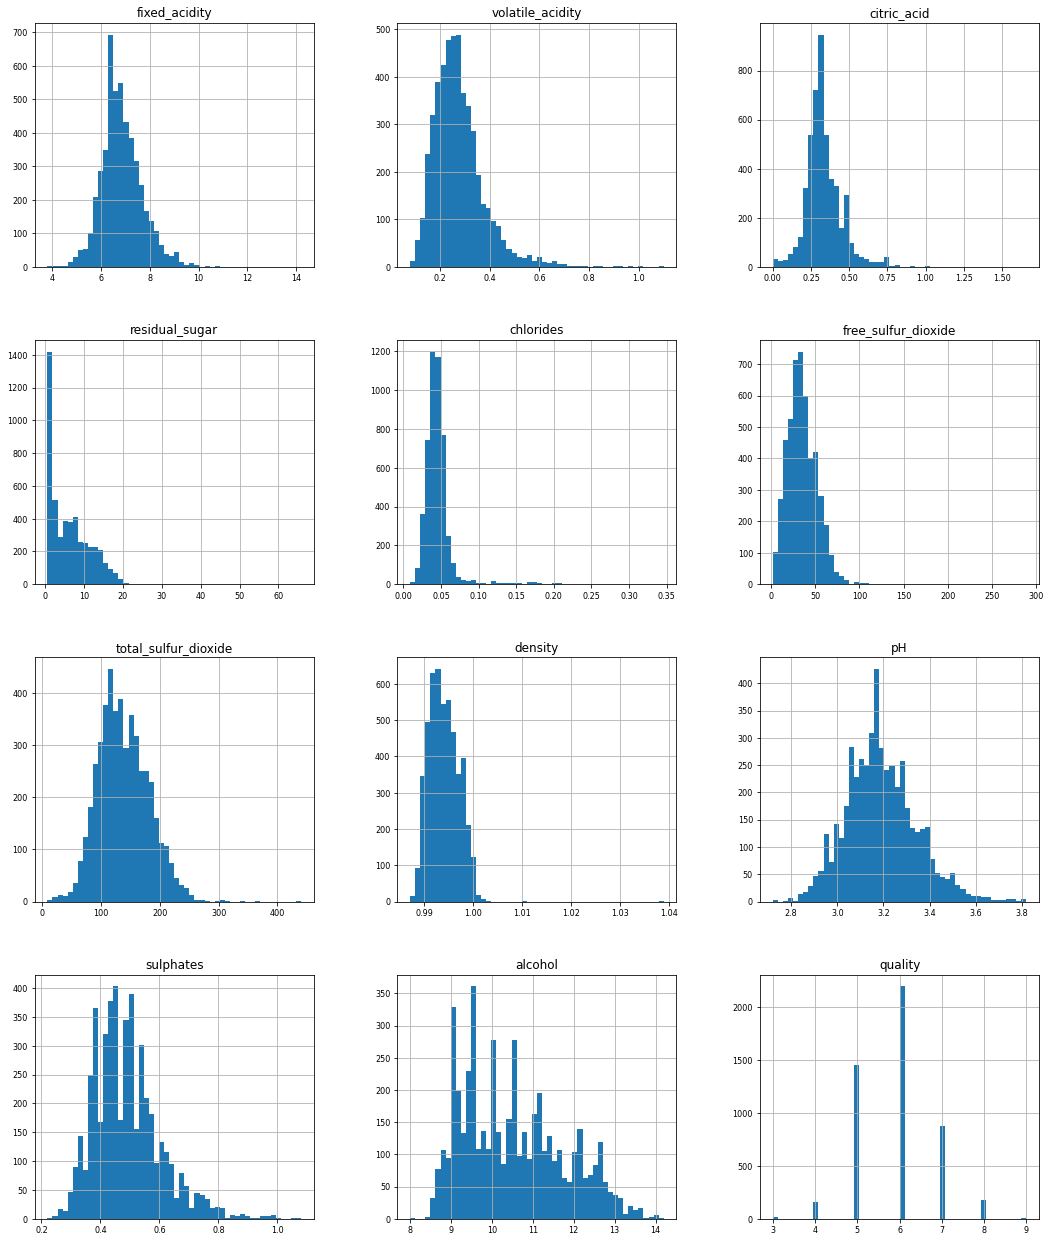

In [8]:
df.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)

In [9]:
corr = df.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

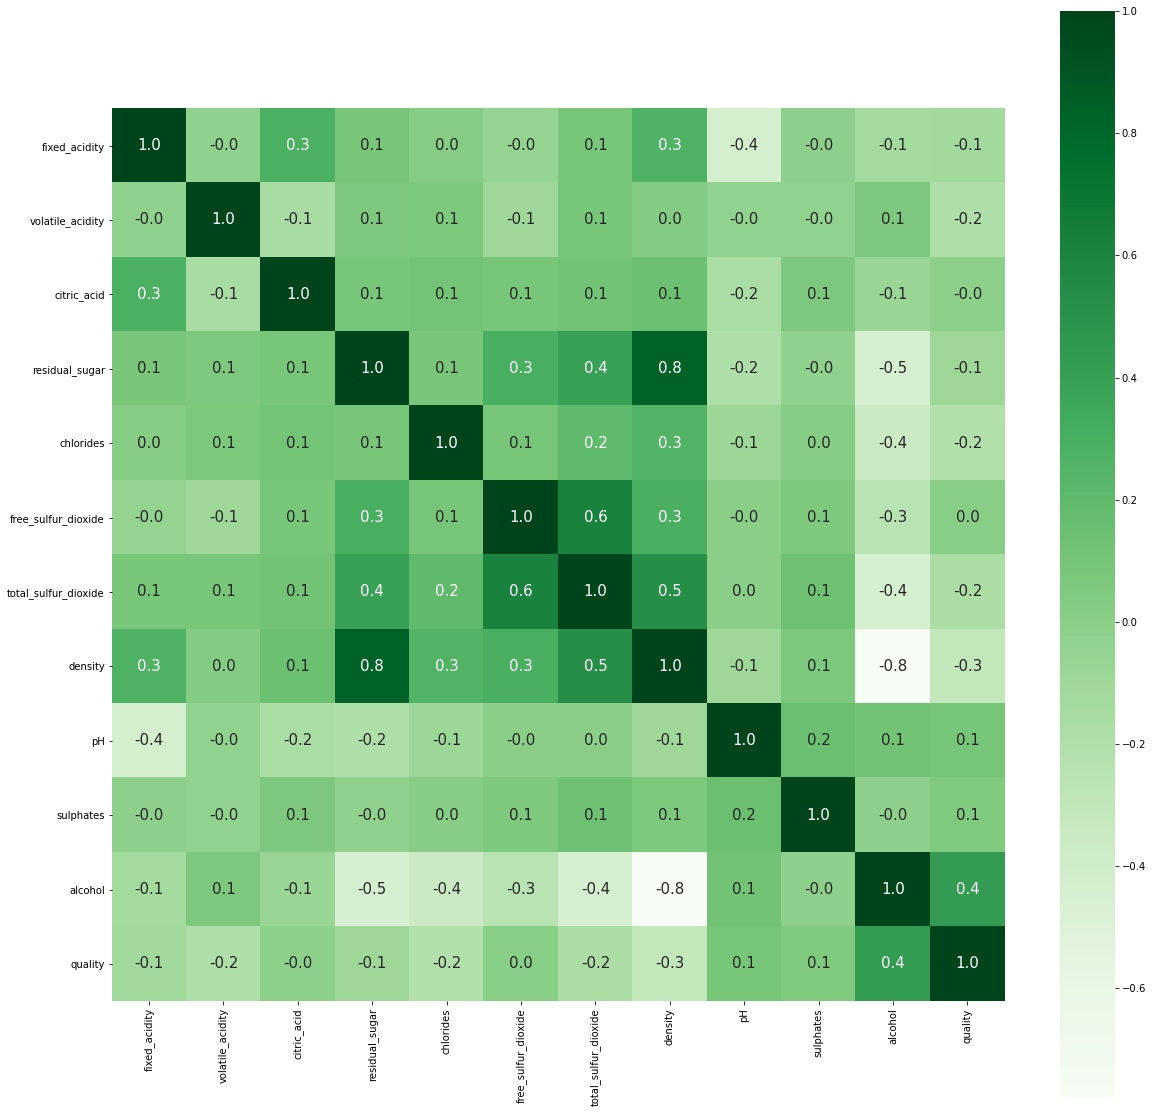

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

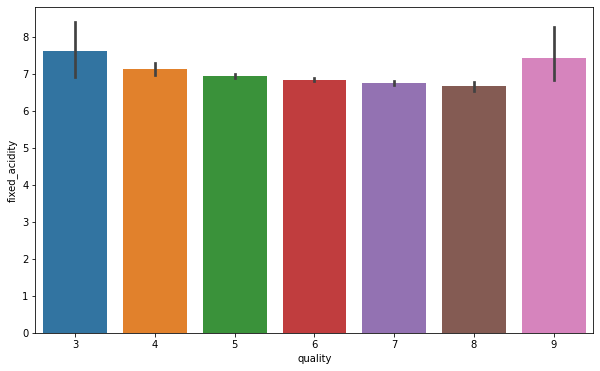

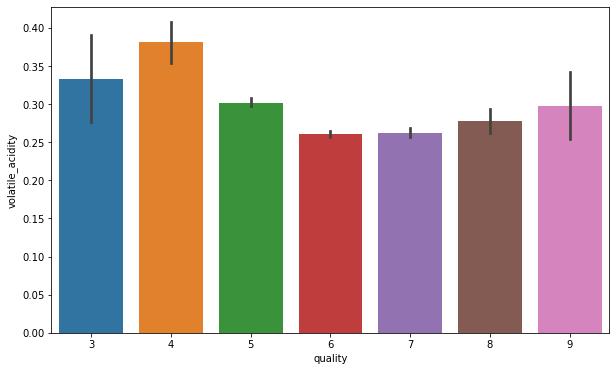

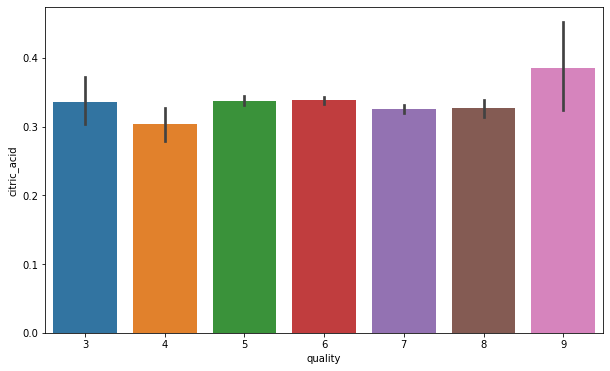

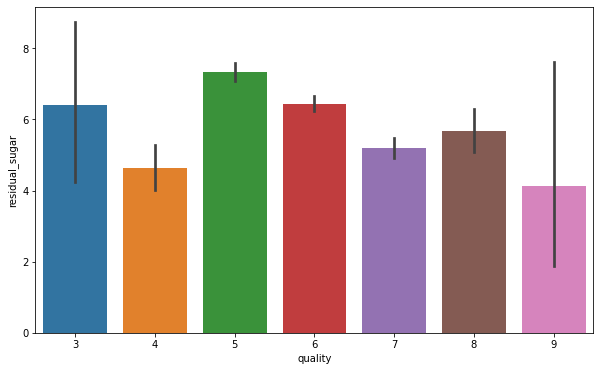

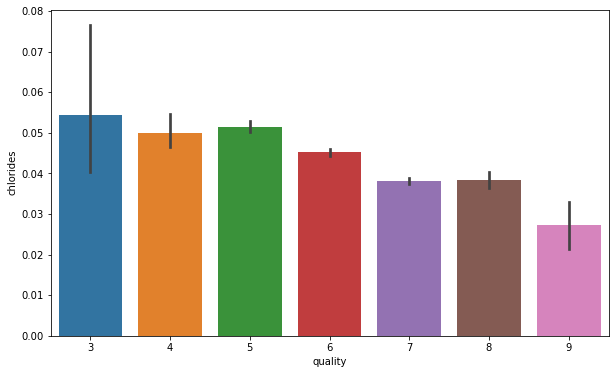

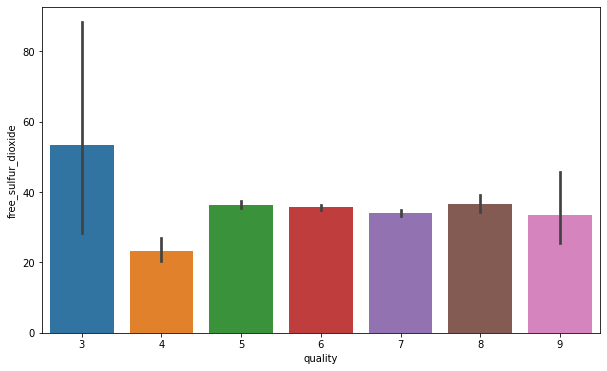

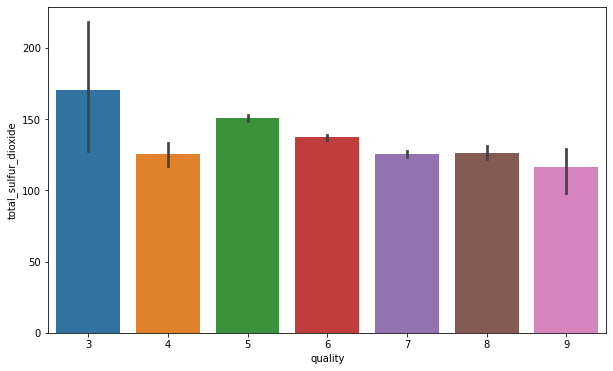

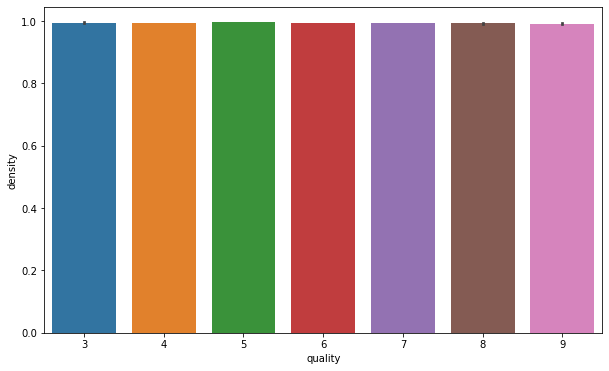

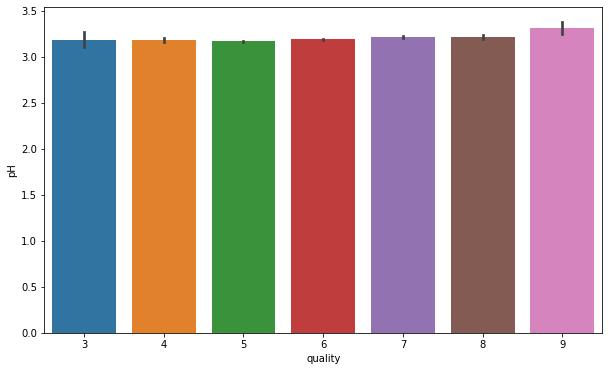

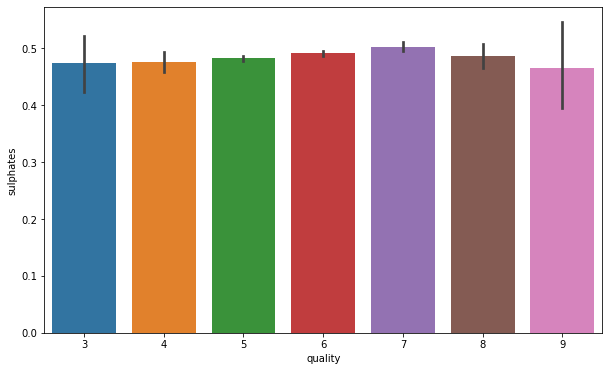

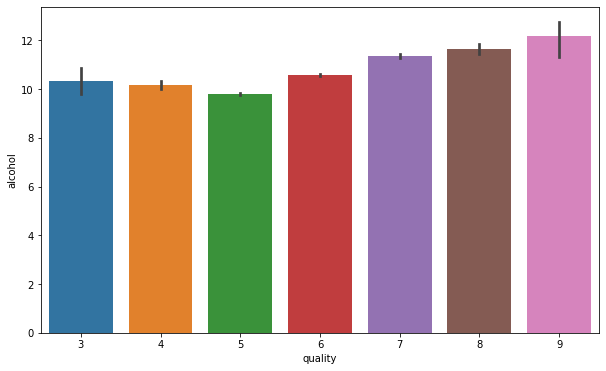

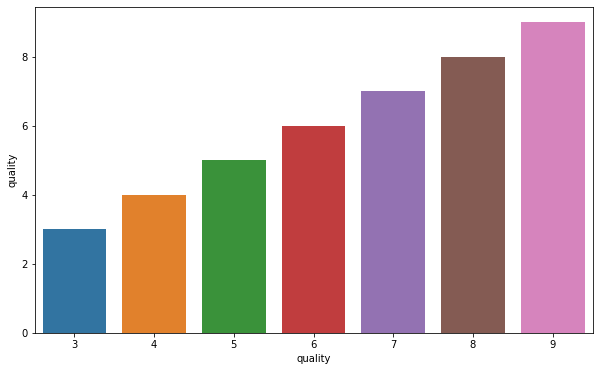

In [11]:
columns = df.columns
for i in columns:
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = i, data = df)

In [12]:
features = dataset.drop(['quality'], axis=1)
label = dataset['quality']

In [18]:
import sys
scalers = [StandardScaler(), PowerTransformer(method='yeo-johnson', standardize=True, copy=True), PowerTransformer(method='box-cox',standardize=True, copy=True), QuantileTransformer(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
for i in scalers:
    try:
        scaler = i
        features_scaled = scaler.fit_transform(features.values)
        label_scaled = scaler.fit_transform(label.values.reshape(-1,1))
        feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, random_state=10)
                    
        lm = LinearRegression()
        lm.fit(feature_train, label_train)
        predictions = lm.predict(feature_test)

        mse = mean_squared_error(label_test, predictions)
        mae = mean_absolute_error(label_test, predictions)
        r2 = r2_score(label_test, predictions)
        print("Preprocessing by {}".format(i))
        print("MSE (Mean Squared Error)", round(mse, 3))
        print("MAE (Mean Absolute Error)", round(mae, 3))
        print("r^2 score", round(r2,3))
        print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, predictions)), 3))
        print("")
    except:
        print("Unexpected error:", sys.exc_info()[0])
        print("")
        pass

Preprocessing by StandardScaler()
MSE (Mean Squared Error) 0.708
MAE (Mean Absolute Error) 0.655
r^2 score 0.289
RMSE (Root Mean Squared Error): 0.841

Preprocessing by PowerTransformer()
MSE (Mean Squared Error) 0.698
MAE (Mean Absolute Error) 0.653
r^2 score 0.293
RMSE (Root Mean Squared Error): 0.835

Unexpected error: <class 'ValueError'>

Preprocessing by QuantileTransformer()
MSE (Mean Squared Error) 0.05
MAE (Mean Absolute Error) 0.187
r^2 score 0.315
RMSE (Root Mean Squared Error): 0.225

Preprocessing by MinMaxScaler()
MSE (Mean Squared Error) 0.015
MAE (Mean Absolute Error) 0.097
r^2 score 0.289
RMSE (Root Mean Squared Error): 0.124

Preprocessing by MaxAbsScaler()
MSE (Mean Squared Error) 0.007
MAE (Mean Absolute Error) 0.064
r^2 score 0.289
RMSE (Root Mean Squared Error): 0.083

Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.555
MAE (Mean Absolute Error) 0.58
r^2 score 0.289
RMSE (Root Mean Squared Error): 0.745



Preprocessing tidak optimal karena nilai r^2 score yang diperoleh dari semua metode sangat rendah (underfitting) dan nilai standar deviasi yang diperoleh juga ada yang relatif tinggi dan ada yang relatif rendah. Data winequality ini tidak cocok dianalisis dengan metode regresi linear karena lebih condong ke problem classification. Metode box-cox juga tidak dapat digunakan karena box-cox harus dilakukan pada dataset yang positif.

'''
2
'''

In [24]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
est_num = [*range(10, 201, 10)]
for index, val in enumerate(est_num):
    rfg = RandomForestRegressor(n_estimators = val, bootstrap = True, max_leaf_nodes = None,max_features = 'sqrt', random_state=10)
    rfg.fit(feature_train, label_train)
    y_pred = rfg.predict(feature_test)
    print('Accuracy of Random Forest with estimator {} on test set: {:.2f}'.format(val, rfg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(i))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of Random Forest with estimator 10 on test set: 0.53
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.371
MAE (Mean Absolute Error) 0.438
r^2 score 0.526
RMSE (Root Mean Squared Error): 0.609

Accuracy of Random Forest with estimator 20 on test set: 0.55
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.35
MAE (Mean Absolute Error) 0.432
r^2 score 0.551
RMSE (Root Mean Squared Error): 0.592

Accuracy of Random Forest with estimator 30 on test set: 0.57
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.34
MAE (Mean Absolute Error) 0.427
r^2 score 0.565
RMSE (Root Mean Squared Error): 0.583

Accuracy of Random Forest with estimator 40 on test set: 0.56
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.343
MAE (Mean Absolute Error) 0.427
r^2 score 0.561
RMSE (Root Mean Squared Error): 0.585

Accuracy of Random Forest with estimator 50 on test set: 0.56
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.342
MAE (Mean Absolute Error) 0.4

In [15]:
#XGBoost
import xgboost as xgb
est_num = [*range(10, 201, 10)]
for index, val in enumerate(est_num):
    xgreg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, eta=0.3, learning_rate=0.1, max_depth=10, n_estimators = val)
    xgreg.fit(feature_train, label_train)
    y_pred = xgreg.predict(feature_test)
    print('Accuracy of xgboost with estimator {} on test set: {:.2f}'.format(val, xgreg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(i))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of xgboost with estimator 10 on test set: 0.34
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.515
MAE (Mean Absolute Error) 0.572
r^2 score 0.34
RMSE (Root Mean Squared Error): 0.718

Accuracy of xgboost with estimator 20 on test set: 0.47
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.416
MAE (Mean Absolute Error) 0.5
r^2 score 0.467
RMSE (Root Mean Squared Error): 0.645

Accuracy of xgboost with estimator 30 on test set: 0.49
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.394
MAE (Mean Absolute Error) 0.473
r^2 score 0.495
RMSE (Root Mean Squared Error): 0.628

Accuracy of xgboost with estimator 40 on test set: 0.51
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.386
MAE (Mean Absolute Error) 0.462
r^2 score 0.505
RMSE (Root Mean Squared Error): 0.622

Accuracy of xgboost with estimator 50 on test set: 0.51
Preprocessing by RobustScaler()
MSE (Mean Squared Error) 0.382
MAE (Mean Absolute Error) 0.453
r^2 score 0.51
RMSE (Root Me

In [16]:
#SVR
from sklearn.svm import SVR

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1))
feature_train, feature_test,label_train, label_test = train_test_split(features_scaled, label_scaled, random_state=10)

kernels = ['rbf', 'poly', 'linear']
for kernel in kernels:
    svreg = SVR(kernel=kernel)
    svreg.fit(feature_train, label_train)
    y_pred = svreg.predict(feature_test)
    print('Accuracy of SVR with kernel {} on test set: {:.2f}'.format(kernel, svreg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(kernel))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of SVR with kernel rbf on test set: 0.39
Preprocessing by rbf
MSE (Mean Squared Error) 0.607
MAE (Mean Absolute Error) 0.59
r^2 score 0.39
RMSE (Root Mean Squared Error): 0.779

Accuracy of SVR with kernel poly on test set: 0.14
Preprocessing by poly
MSE (Mean Squared Error) 0.854
MAE (Mean Absolute Error) 0.68
r^2 score 0.143
RMSE (Root Mean Squared Error): 0.924

Accuracy of SVR with kernel linear on test set: 0.28
Preprocessing by linear
MSE (Mean Squared Error) 0.713
MAE (Mean Absolute Error) 0.654
r^2 score 0.284
RMSE (Root Mean Squared Error): 0.844



In [17]:
#kNNRegressors
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = [*range(1, 20, 1)]
for index,val in enumerate(n_neighbors):
    kreg = KNeighborsRegressor(n_neighbors=val, weights='distance', algorithm='auto')
    kreg.fit(feature_train, label_train)
    y_pred = kreg.predict(feature_test)
    print('Accuracy of kNNRegressors with n_neighbor {} on test set: {:.2f}'.format(val, kreg.score(feature_test, label_test)))
    mse = mean_squared_error(label_test, y_pred)
    mae = mean_absolute_error(label_test, y_pred)
    r2 = r2_score(label_test, y_pred)
    print("Preprocessing by {}".format(kernel))
    print("MSE (Mean Squared Error)", round(mse, 3))
    print("MAE (Mean Absolute Error)", round(mae, 3))
    print("r^2 score", round(r2,3))
    print('RMSE (Root Mean Squared Error):', round(np.sqrt(mean_squared_error(label_test, y_pred)), 3))
    print("")

Accuracy of kNNRegressors with n_neighbor 1 on test set: 0.21
Preprocessing by linear
MSE (Mean Squared Error) 0.786
MAE (Mean Absolute Error) 0.506
r^2 score 0.211
RMSE (Root Mean Squared Error): 0.887

Accuracy of kNNRegressors with n_neighbor 2 on test set: 0.37
Preprocessing by linear
MSE (Mean Squared Error) 0.627
MAE (Mean Absolute Error) 0.48
r^2 score 0.371
RMSE (Root Mean Squared Error): 0.792

Accuracy of kNNRegressors with n_neighbor 3 on test set: 0.44
Preprocessing by linear
MSE (Mean Squared Error) 0.562
MAE (Mean Absolute Error) 0.468
r^2 score 0.435
RMSE (Root Mean Squared Error): 0.75

Accuracy of kNNRegressors with n_neighbor 4 on test set: 0.47
Preprocessing by linear
MSE (Mean Squared Error) 0.527
MAE (Mean Absolute Error) 0.459
r^2 score 0.471
RMSE (Root Mean Squared Error): 0.726

Accuracy of kNNRegressors with n_neighbor 5 on test set: 0.50
Preprocessing by linear
MSE (Mean Squared Error) 0.501
MAE (Mean Absolute Error) 0.45
r^2 score 0.497
RMSE (Root Mean Square

Dari model yang digunakan, RandomForestRegressor rata-rata memiliki nilai r^2 score yang lebih tinggi dan nilai rmse yang lebih rendah. Nilai r^2 score yang tinggi artinya outputnya tidak underfit dan tidak overfit. Outputnya memiliki trend diagonal. Sedangkan rmse yang rendah artinya standar deviasinya rendah. Data tidak memiliki banyak outlier atau dapat dikatakan model kita sudah optimal. Nilai r^2 score yang diperoleh dari model RandomForestRegressor dengan n_estimator 30 adalah 0.57, sedangkan nilai rmse yang diperoleh dari model tersebut adalah 0.583.